In [16]:
pd.set_option('display.max_columns', None)

In [10]:
import pandas as pd

subdf = pd.read_csv('RolexSubmarinerListings_Yearly.csv')
sampledf = pd.read_csv('2020Submariner_50s.csv')
sampledf = pd.read_feather('ListingDB.feather').set_index('index')
sampledf

,Availability,Base caliber,Basic Info,Bezel material,Bracelet color,Bracelet material,Bracelet/strap,Brand,Caliber,Case,...,retrieved,url,Buckle width,Lug width,Code,Thickness,Others,Frequency,Bracelet length,Bracelet thickness
index,,,,,,,,,,,,,,,,,,,,,
15303903.htm,Available now,Rolex 3135,Basic Info,Ceramic,Gold/Steel,Gold/Steel,Bracelet/strap,Rolex,Caliber,Case,...,2020-06-02 10:41:55.225435,https://www.chrono24.com.au/rolex/15303903.htm,None,None,None,None,None,None,None,None
15186072.htm,Available now,None,Basic Info,Ceramic,Gold,Yellow gold,Bracelet/strap,Rolex,Caliber,Case,...,2020-06-02 10:41:55.711347,https://www.chrono24.com.au/rolex/15186072.htm,None,None,None,None,None,None,None,None
15078703.htm,Ready to ship in 3-5 days,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,...,2020-06-02 10:41:56.181784,https://www.chrono24.com.au/rolex/15078703.htm,None,None,None,None,None,None,None,None
15295460.htm,Available now,3130,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,...,2020-06-02 10:41:57.104388,https://www.chrono24.com.au/rolex/15295460.htm,None,None,None,None,None,None,None,None
15287340.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,...,2020-06-02 10:41:57.561366,https://www.chrono24.com.au/rolex/15287340.htm,16 mm,20 mm Size guide function openLugwidthDialog...,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970381.htm,Available now,3130,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,...,2020-06-02 17:56:05.775362,https://www.chrono24.com.au/rolex/14970381.htm,None,None,None,None,None,None,None,None
15134236.htm,Available now,3130,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,...,2020-06-02 17:56:06.267709,https://www.chrono24.com.au/rolex/15134236.htm,None,None,S8500026222,None,None,None,None,None
15094516.htm,Available now,None,Basic Info,White gold,None,White gold,Bracelet/strap,Rolex,Caliber,Case,...,2020-06-02 17:56:06.761562,https://www.chrono24.com.au/rolex/15094516.htm,None,None,None,None,None,None,None,None


In [22]:
from sklearn import tree

res = sampledf[['Year','Reference number','Bezel material','Bracelet material','Case material','Clasp','Crystal','Dial','Movement/Caliber','Number of jewels']].dropna(how='any')

X=pd.get_dummies(res[['Year','Bezel material','Bracelet material','Case material','Clasp','Crystal','Dial','Movement/Caliber','Number of jewels']])
y=res['Reference number']
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.02)
clf = clf.fit(X, y)

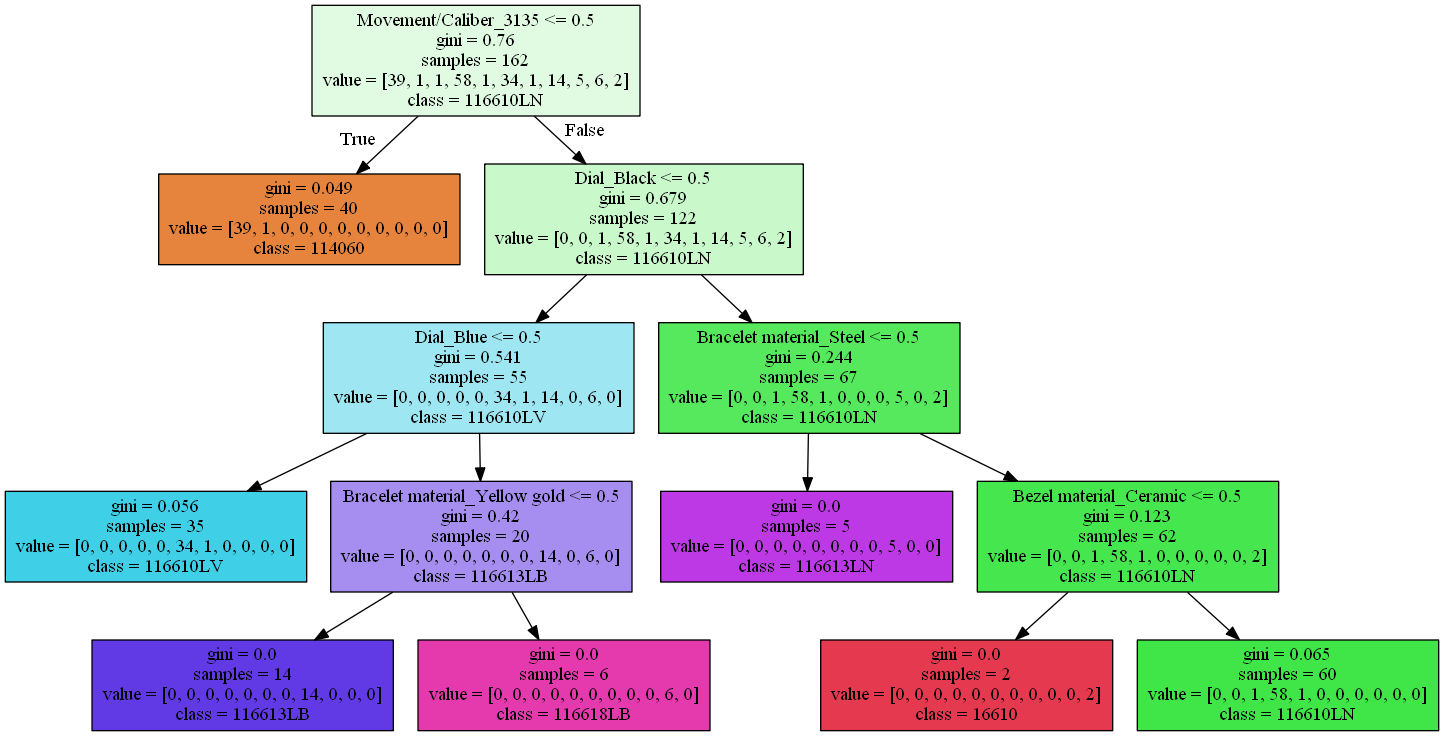

In [23]:
from io import StringIO
import os
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn import tree
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=X.columns, class_names=y.drop_duplicates().sort_values().values, filled=True)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [13]:
y.drop_duplicates().sort_values().values

array(['114060', '114060-RMD', '116610LB', '116610LN',
       '116610LN SUB MARINER DATA CERAMICA NEW NEW NEW 2020', '116610LV',
       '116610LV Oman Logo', '116613LB', '116613LN', '116618LB', '16610'],
      dtype=object)

In [17]:
sampledf.loc[
    ~(sampledf['Movement/Caliber'] == '3130')
#     (sampledf['Reference number'] == '116610LV')&
#     (sampledf['Dial'] == 'Black')&
#     (sampledf['Bracelet material'] == 'Steel')
]

,Availability,Base caliber,Basic Info,Bezel material,Bracelet color,Bracelet material,Bracelet/strap,Brand,Caliber,Case,Case diameter,Case material,Clasp,Clasp material,Condition,Crystal,Dial,Dial numerals,Expected delivery,Functions,Gender,Listing number,Location,Model,Movement,Movement/Caliber,Number of jewels,Payment Method,Power reserve,Reference number,Scope of delivery,Water resistance,Year,name,price,retrieved,url,Buckle width,Lug width,Code,Thickness,Others,Frequency,Bracelet length,Bracelet thickness
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
15303903.htm,Available now,Rolex 3135,Basic Info,Ceramic,Gold/Steel,Gold/Steel,Bracelet/strap,Rolex,Caliber,Case,40 mm,Gold/Steel,Fold clasp,Gold/Steel,"New (Brand new, without any signs of wear)",Sapphire crystal,Blue,No numerals,"Jun 18, 2020 - Jun 30, 2020",Functions,Men's watch/Unisex,940KF7,"Germany, Stuttgart",Submariner Date,Automatic,3135,31,Bank transfer,50 h,116613LB,"Original box, original papers",30 ATM,2020,Rolex Submariner Date LC100 LB Gold/Stahl,25520.0,2020-06-02 10:41:55.225435,https://www.chrono24.com.au/rolex/15303903.htm,None,None,None,None,None,None,None,None
15186072.htm,Available now,None,Basic Info,Ceramic,Gold,Yellow gold,Bracelet/strap,Rolex,Caliber,Case,40 mm,Yellow gold,Fold clasp,Yellow gold,"New (Brand new, without any signs of wear)",Sapphire crystal,Blue,No numerals,"Jun 4, 2020 - Jun 12, 2020",Functions,Men's watch/Unisex,91HNC9,"Spain, Torrelavega",Submariner Date,Automatic,3135,31,Bank transfer,50 h,116618LB,"Original box, original papers",30 ATM,2020,Rolex Submariner Date 116618LB Yellow Gold 202...,58700.0,2020-06-02 10:41:55.711347,https://www.chrono24.com.au/rolex/15186072.htm,None,None,None,None,None,None,None,None
15078703.htm,Ready to ship in 3-5 days,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,40 mm,Steel,Fold clasp,Steel,"New (Brand new, without any signs of wear)",Sapphire crystal,Black,No numerals,"Jun 18, 2020 - Jun 30, 2020",Functions,Men's watch/Unisex,8Z6SV5,"Malaysia, Malaysia",Submariner Date,Automatic,3135,31,None,48 h,116610LN,"Original box, original papers",30 ATM,2020,Rolex Submariner Date,19184.0,2020-06-02 10:41:56.181784,https://www.chrono24.com.au/rolex/15078703.htm,None,None,None,None,None,None,None,None
15287340.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,40 mm,Steel,Fold clasp,Steel,"New (Brand new, without any signs of wear)",Sapphire crystal,Black,No numerals,"Jun 4, 2020 - Jun 12, 2020",Functions,Men's watch/Unisex,93NSC0,"Italy, Parete",Submariner Date,Automatic,3135,31,Bank transfer,48 h,116610LN,"Original box, original papers",30 ATM,2020,Rolex Submariner Date Nero 116610LN NEW 2020 I...,18545.0,2020-06-02 10:41:57.561366,https://www.chrono24.com.au/rolex/15287340.htm,16 mm,20 mm Size guide function openLugwidthDialog...,None,None,None,None,None,None
15210832.htm,Available now,None,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,40 mm,Steel,Fold clasp,Steel,"Unworn (Mint condition, without signs of wear)",Sapphire crystal,Green,No numerals,"Jun 4, 2020 - Jun 12, 2020",Functions,Men's watch/Unisex,920R44,"United States of America, New York, New York",Submariner Date,Automatic,3135,None,Bank transfer,48 h,116610LV,"Original box, original papers",30 ATM,2020,Rolex Submariner Hulk Steel Green Ceramic 40MM...,26431.0,2020-06-02 10:41:58.675153,https://www.chrono24.com.au/rolex/15210832.htm,None,None,RSUB07066,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15118671.htm,Available now,None,Basic Info,Ceramic,Silver,Steel,Bracelet/strap,Rolex,Caliber,Case,40 mm,Steel,Fold clasp,None,"Unworn (Mint condition, without signs of wear)",Sapphire crystal,None,None,"Jun 18, 2020 - Jun 30, 2020",Functions,None,901N39,"Germany, Rheda-Wiedenbrück",Submariner Date,Autom

In [9]:
sampledf.loc[
#     (sampledf['Movement/Caliber'] == '3130')&
    (sampledf['Reference number'] == '116610LN SUB MARINER DATA CERAMICA NEW NEW NEW 2020')
#     (sampledf['Dial'] == 'Black')&
#     (sampledf['Bracelet material'] == 'Steel')
]

,Availability,Base caliber,Basic Info,Bezel material,Bracelet color,Bracelet material,Bracelet/strap,Brand,Caliber,Case,...,name,price,retrieved,url,Buckle width,Lug width,Code,Thickness,Others,Frequency
index,,,,,,,,,,,,,,,,,,,,,
15189813.htm,Available now,cal. 3135,Basic Info,Ceramic,Steel,Steel,Bracelet/strap,Rolex,Caliber,Case,...,Rolex Submariner Date NEW NEW NEVER WORN,18716.0,2020-06-02 11:00:13.582464,https://www.chrono24.com.au/rolex/15189813.htm,None,None,None,None,None,None
